# Графовые алгоритмы

Граф - это структура, которая отображает данные в виде *вершин* и *ребер*. Граф может быть представлени в виде **aGraph = (V, E)** , где **V** - набор вершин, а **E** - ребро между ними. Ребро соединяет две вершины и таким образом отображает связь между ними.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## Поиск в ширину

Алгоритм **BFS (breadth-first search)** начинает с корневой вершины и исследует вершины в окрестности. Затем он преходит на следующий уровень окрестности и повторяет процесс.

In [3]:
def bfs(graph, start):
    visited = []
    queue = [start]
    
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            neighbours = graph[node]
            for neighbour in neighbours:
                queue.append(neighbour)
    return visited

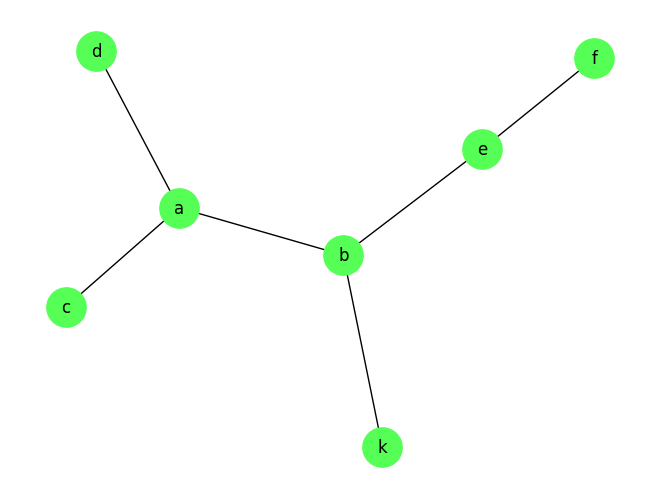

In [52]:
vertices = ('a', 'b', 'c', 'd', 'e', 'f', 'k')
edges = [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'e'), ('b', 'a'),
         ('e', 'b'), ('e', 'f'), ('f', 'e'), ('c', 'a'), ('k', 'b')]

G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)

nx.draw(G,
        pos=nx.spring_layout(G),
        with_labels=True,
        node_color='#55ff55',
        node_size=800)

In [24]:
bfs(G, 'a')

['a', 'b', 'c', 'd', 'e', 'k', 'f']

## Поиск в глубину

Алгоритм **DFS (depth-first search)** - это альтернатива BFS, используемая для поиска данных в графе. DFS отличается от BFS тем, что после запуска из корневой вершины алгоритм проходит как можно дальше по каждому из уникальных путей, перебирая их одина за другим. 

Логика алгоритма следующая:

- Как только он успешно достигает конечной глубины каждого пути, он помечает флагом все вершины на этом пути как посещенные. После завершения пути алгоритм возвращается назад. 
- Если он может найти еще один уникальный путь от корневого узла, процесс повторяется. 
- Алгоритм продолжает двигаться по новым ветвям до тех пор, пока все ветви не будут посещены.

In [38]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

{'a', 'b', 'c', 'd', 'e', 'f'}

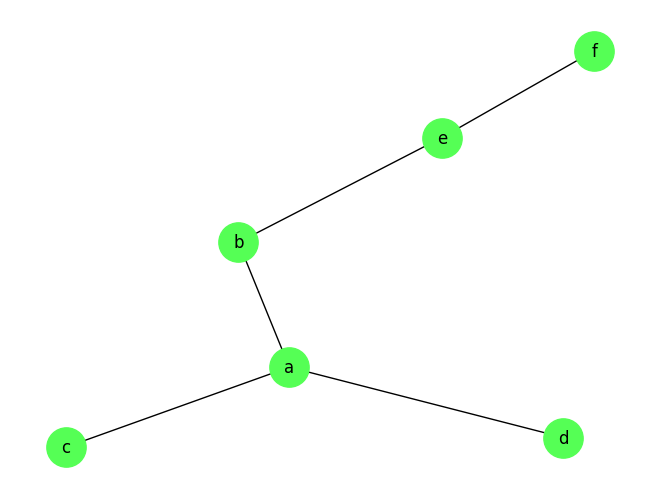

In [53]:
graph = {'a': set(['b','c','d']),
         'b': set(['e','a']),
         'c': set(['a']),
         'd': set(['a']),
         'e': set(['b','f']),
         'f': set(['e']),
         }

nx.draw(nx.Graph(graph),
        pos=nx.spring_layout(G),
        with_labels=True,
        node_color='#55ff55',
        node_size=800)

dfs(graph, start='a')

## Задание (2 балла) + 4 б

Создать и нарисовать произвольный граф двумя описанными выше способами, и реальзовать для него алгоритмы BFS и DFS

In [74]:
#bfs
def my_bfs(graph, start) -> list:
    if isinstance(graph, dict):
        graph = list(graph.values())

    visited = set()          # Множество посещенных вершин
    queue = [start]          # Очередь для обхода
    result = []

    while queue:
        node = queue.pop(0)
        if node not in visited:
            result.append(node)
            visited.add(node)
            queue.extend(neighbour for neighbour in graph[node] if neighbour not in visited)
    return result

In [79]:
def my_dfs(graph, start) -> list:
    if isinstance(graph, dict):
        graph = list(graph.values())

    visited = set()  # Множество для отслеживания посещенных вершин
    stack = [start]  # Используем стек для обхода
    result = []

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            result.append(vertex)
            visited.add(vertex)
            neighbors = list(graph[vertex])
            for neighbor in neighbors:
                if neighbor not in visited:
                    stack.append(neighbor)
    
    return result

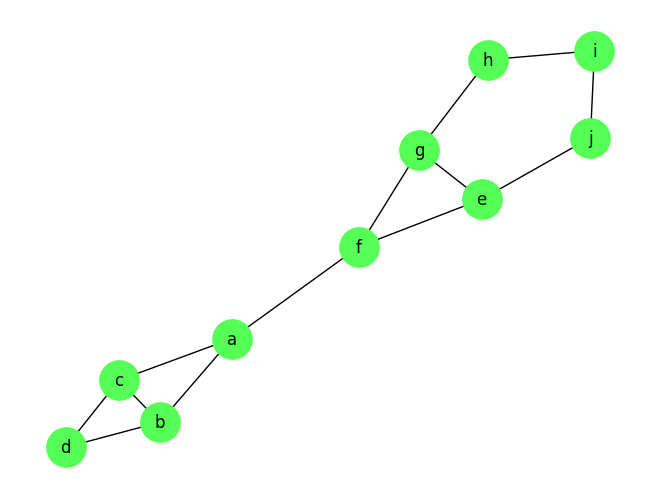

In [81]:
vertices = ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j')
edges = [('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('c', 'd'),
         ('e', 'f'), ('e', 'g'), ('f', 'g'), ('g', 'h'), ('h', 'i'), 
         ('i', 'j'), ('j', 'e'), ('a', 'f')]


graph_one = nx.Graph()
graph_one.add_nodes_from(vertices)
graph_one.add_edges_from(edges)

nx.draw(graph_one,
        pos=nx.spring_layout(graph_one),
        with_labels=True,
        node_color='#55ff55',
        node_size=800)

In [77]:
my_bfs(graph_one, 'a')

['a', 'b', 'c', 'f', 'd', 'e', 'g', 'j', 'h', 'i']

In [80]:
my_dfs(graph_one, 'a')

['a', 'f', 'g', 'h', 'i', 'j', 'e', 'c', 'd', 'b']

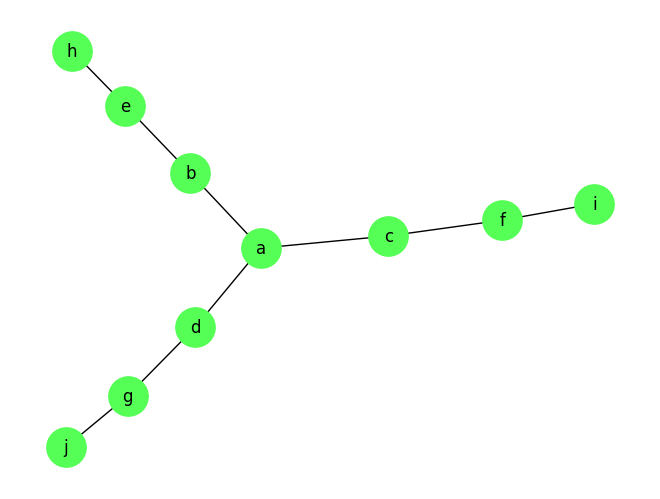

In [83]:
links = {'a': set(['b', 'c', 'd']),
         'b': set(['e', 'a']),
         'c': set(['a', 'f']),
         'd': set(['a', 'g']),
         'e': set(['b', 'h']),
         'f': set(['c', 'i']),
         'g': set(['d', 'j']),
         'h': set(['e']),
         'i': set(['f']),
         'j': set(['g'])
        }


graph_two = nx.Graph(links)

nx.draw(graph_two,
        pos=nx.spring_layout(graph_two),
        with_labels=True,
        node_color='#55ff55',
        node_size=800)

In [84]:
my_bfs(graph_two, 'a')

['a', 'd', 'c', 'b', 'g', 'f', 'e', 'j', 'i', 'h']

In [85]:
my_dfs(graph_two, 'a')

['a', 'b', 'e', 'h', 'c', 'f', 'i', 'd', 'g', 'j']